#### 1.

Przypomnij sobie z wykładu i ewentualnie z wcześniejszych przedmiotów, jakie są cele i zastosowania algorytmów tworzenia skupień. Zapisz odpowiedź poniżej (ta część tego pytania nie jest oceniana).

Przeanalizuj dokładnie rozdział 2.3.1 z dokumentacji scikit. Patrząc na macierz obrazków odpowiedz na pytanie: mając dany rozkład obserwacji (wiersze), jak chciał(a)bym żeby zachował się idealny algorytm wykrywania skupień? Możesz zacząć od ostatniego wiersza (tam, gdzie mamy równomierny rozkład obserwacji) i eliminować algorytmy, które nie spełniają Twoich kryteriów. Pamiętaj jednak, że większość z nich wymaga podania parametrów (tabela pod rysunkami), i te parametry niekoniecznie zostały najlepiej dostosowane do konkretnego rozkładu przypadków. Opisz swoje wnioski z analizy tej macierzy obrazków.

Cele i zastosowania (nieoceniane): 

Cele algorytmów tworzenia skupień to przede wszystkim wykrywanie naturalnych grup w danych bez znajomości etykiet, co pozwala lepiej zrozumieć strukturę zbioru, znaleźć wzorce, segmentować użytkowników czy przygotować dane do dalszej analizy. W praktyce stosuje się je m.in. do segmentacji klientów, analizy obrazów, eksploracji danych czy wykrywania anomalii.

Na poszczególnych danych (wiersze): pochwała i krytyka algorytmów dostępnych w scikit oraz jak powinien działać idealny algorytm: 

Idealny algorytm powinien poprawnie rozdzielać skupienia niezależnie od ich kształtu, rozmiaru i gęstości oraz być odporny na szum i wartości odstające. Widać jednak, że nie ma jednego uniwersalnego rozwiązania: KMeans dobrze radzi sobie z kulistymi skupieniami, DBSCAN wykrywa skupienia o nieregularnych kształtach i ignoruje szum, a Spectral Clustering lepiej rozdziela skupienia nieliniowe. Gdy dane są rozłożone równomiernie, idealny algorytm nie powinien tworzyć sztucznych skupień. Ostatecznie wybór metody i parametrów zależy od charakterystyki danych i oczekiwanego efektu, a każdy algorytm ma swoje mocne i słabe strony widoczne na macierzy obrazków.

#### 2.

Pobierz plik o nazwie odpowiadającej Twojemu numerowi albumu. Nasze dane wyjściowe to 12 głosek, wypowiedzianych – dla głosek, dla których to ma sens – w 4 różnych wysokościach (przykład tutaj). Ze środka każdej głoski (których jest 12*4) wybieramy krótką porcję próbek (np. 256, około 1/200 sekundy) i z tej porcji wyznaczamy moc poszczególnych częstotliwości za pomocą FFT. To, co mamy w pliku jako atrybuty warunkowe, to właśnie amplitudy poszczególnych częstotliwości (podgląd). Ostatnia kolumna to atrybut (liczba) niosący informację o tym, której wysokości i której głoski dotyczy dany wiersz. W tym atrybucie setki (100, 200, 300, 400) mówią o wysokości wypowiedzi (1, 2, 3, 4), natomiast reszta liczby mówi o numerze głoski (0-11).

Zatem zamiana tej liczby (etykiety, atrybutu "decyzyjnego") na znak odpowiadający głosce wygląda tak:

    GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
    data = np.genfromtxt('data.txt', delimiter='\t')
    print(data.shape)
    X = data[:,:-1]
    print(X.shape)
    y = data[:,-1].astype(int)
    etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]  # ['a1', 'e1', 'i1', .., 'r1', 'a2', 'e2', .., 'r4']
Zanim jeszcze wykonasz jakiekolwiek eksperymenty obliczeniowe, zastanów się dokładnie nad oczekiwanym rezultatem. Wiedza dotycząca przetwarzania dźwięku i głosu, rozpoznawania mowy, komunikacji człowiek-komputer może tu pomóc.

Jakiego rozkładu tych 12*4 przypadków w przestrzeni atrybutów warunkowych się spodziewamy? Które przypadki będą bliżej siebie, a które dalej w przestrzeni amplitud częstotliwości? Jak (o ile w ogóle) pogrupują się przypadki?

Jak myślisz, które głoski mogą okazać się trudne do przydzielenia do konkretnych skupisk dlatego, że mogą być "pomiędzy" różnymi głoskami albo mogą przypominać raz takie, raz inne głoski – w zależności od tego, w które miejsce sygnału trafimy wybierając jego króciutki fragment?

Myślę, że w przestrzeni atrybutów warunkowych przypadki pogrupują się według typu głoski, bo każda głoska ma charakterystyczny rozkład widma, ale mogą też pojawić się podgrupy związane z wysokością dźwięku, zwłaszcza dla samogłosek. Przypadki tej samej głoski, ale o różnych wysokościach, mogą być do siebie dość podobne, choć różnice w wysokości mogą powodować lekkie przesunięcia w widmie. Najbliżej siebie będą głoski o podobnym brzmieniu, np. samogłoski lub spółgłoski dźwięczne, a dalej – głoski o zupełnie innym charakterze akustycznym. Trudne mogą być do rozdzielenia głoski, które mają zbliżone widma, np. 'z', 'ż', 'ź', albo takie, które w zależności od fragmentu sygnału mogą przypominać inne, np. 'g' i 'r' lub 'sz' i 'ż'. Dodatkowo, jeśli fragment sygnału trafi na przejście między dźwiękami lub na mniej charakterystyczny moment artykulacji, przypadek może być trudny do jednoznacznego przypisania do skupiska.

#### 3.

Ponieważ mamy kilkadziesiąt wymiarów (atrybutów warunkowych), chcielibyśmy coś powiedzieć o tych danych bez ich poważnego transformowania. Dlatego zwizualizuj przypadki za pomocą PCA w dwóch wymiarach; załącz obrazek i podaj zachowany po transformacji do 2D procent wariancji. Oczywiście podczas transformacji nie używaj atrybutu "decyzyjnego", jednak użyj go po to, żeby dodać etykiety do przypadków uzyskując efekt podobny jak poniżej:


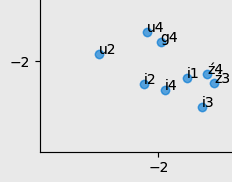

Może przydać się fragment kodu:

   plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.5)
   for i,pair in enumerate(X_reduced):
      ax.text(pair[0], pair[1], etykiety[i])
Czy Twoje wcześniejsze przewidywania co do rozkładu przypadków w przestrzeni i ewentualnej trudności niektórych głosek sprawdziły się, czy nie? Dlaczego? Czy transformacja do 2D (lub 3D, jeśli wolisz) pozwala nam z zadowalającym przekonaniem wnioskować o tym, jak wygląda oryginalna przestrzeń?

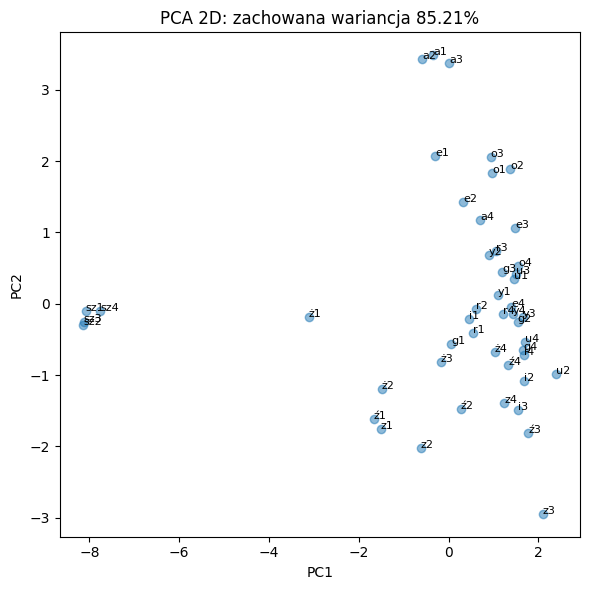

Zachowany procent wariancji po PCA do 2D: 85.21%


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Wczytanie danych
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('162961-clustersel.txt', delimiter='\t')
X = data[:,:-1]
y = data[:,-1].astype(int)
etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]

# PCA do 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
var2d = np.sum(pca.explained_variance_ratio_)

plt.figure(figsize=(6,6))
plt.scatter(X_reduced[:,0], X_reduced[:,1], alpha=0.5)
for i, pair in enumerate(X_reduced):
    plt.text(pair[0], pair[1], etykiety[i], fontsize=8)
plt.title(f'PCA 2D: zachowana wariancja {var2d*100:.2f}%')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

print(f'Zachowany procent wariancji po PCA do 2D: {var2d*100:.2f}%')

#### 4.

Ponieważ wiemy już co nieco o tym, jak rozmieszczone są przypadki w przestrzeni, pora na kolejną (nieocenianą) hipotezę. Mamy 12 głosek w 4 wysokościach wypowiedzi.

Powiedzmy, że mamy wiedzę a priori o tym, że głosek w zbiorze próbek dźwiękowych jest 12, więc postanawiamy szukać właśnie k=12 skupień (w oryginalnej przestrzeni atrybutów, a nie po redukcji PCA). Jak uważasz, jak zachowa się k-means: czy 12 skupień będzie odpowiadało poszczególnym głoskom?
A jeśli postawimy sobie za cel znaleźć k=2 duże skupienia: samogłoski i spółgłoski, to jak myślisz, jaki będzie efekt? Czy odkryte skupiska będą odpowiadały faktycznym podziałom przypadków na samogłoski i spółgłoski, tak, jak to wskazuje klasa z atrybutu decyzyjnego?
A jeśli bazując na wiedzy a priori o 4 wysokościach wypowiedzi ustawimy k=4, to czy odkryte skupiska odzwierciedlą 4 wysokości wypowiedzi?

Dla k=12 algorytm k-means odkryje skupiska nie do końca odpowiadające poszczególnym głoskom, ponieważ niektóre głoski mają podobne widma i mogą zostać połączone w jedno skupisko, a inne – bardziej zróżnicowane – mogą zostać rozdzielone na kilka skupień. K-means preferuje skupiska kuliste i o podobnej liczności, więc niekoniecznie odzwierciedli rzeczywisty podział na 12 głosek.

Dla k=2 algorytm k-means raczej nie odkryje skupisk odpowiadających dokładnie samogłoskom i spółgłoskom, ponieważ różnice między tymi grupami nie muszą być dominujące w przestrzeni cech – niektóre spółgłoski mogą być bliżej samogłosek niż innych spółgłosek. Skupiska mogą być podzielone według innych cech, np. energii lub wysokości, a nie zgodnie z podziałem lingwistycznym.

Dla k=4 algorytm k-means prawdopodobnie nie odkryje skupisk odpowiadających 4 wysokościom wypowiedzi, ponieważ różnice wysokości wpływają na widmo, ale nie są jedynym czynnikiem różnicującym przypadki. Skupiska mogą być mieszane – przypadki o różnych wysokościach, ale podobnych widmach, mogą trafić do tego samego skupiska. K-means nie jest w stanie wyodrębnić wysokości, jeśli nie jest to główny czynnik różnicujący dane.

#### 5.

Pora na weryfikację hipotez dla k=12, 4 i 2. Użyj k-means i uzyskane centroidy pokaż czerwonymi krzyżykami w tej samej przestrzeni 2D (ewentualnie 3D, jeśli wolisz), która została wytworzona przez PCA. Zaznacz w jakiś sposób (np. ten sam kolor lub etykieta) obserwacje należące do tych samych skupisk (bazując oczywiście na oryginalnej przestrzeni atrybutów).

```python
   k_means = KMeans(init='k-means++', n_clusters=12, n_init=10)
   k_means.fit(X)
   clustercenters_trans = pca.transform(uzyskane_wspolrzedne_centroidow_kmeans)
   print('kmeans:',clustercenters_trans.shape)  # kontrola tego, że centroidy trafiły do zredukowanej przez PCA przestrzeni
   ax.scatter(clustercenters_trans[:,0], clustercenters_trans[:,1], marker='x', color='red')
   # TODO Zaznacz w jakiś sposób (np. kolor lub etykieta) obserwacje należące do tych samych skupisk
   #      (bazując na oryginalnej przestrzeni atrybutów).
```

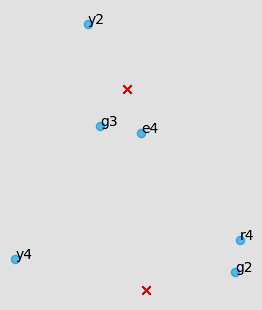

W odpowiedzi załącz wizualizacje.
Czy Twoje hipotezy się sprawdziły?
Co jest odpowiedzialne za to, że przypadki nie grupują się idealnie wedle głosek (12), wysokości wypowiedzi (4) oraz podziału na samo/spółgłoski (2), a centroidy nie trafiają idealne w środki ładnych, odseparowanych od siebie skupisk?
Używanie surowych wartości amplitud jest niezgodne z percepcją głośności człowieka. Zlogarytmuj wszystkie amplitudy w zbiorze i wygeneruj znów wizualizacje k-means. Opisz różnice. Jeśli uważasz, że tak zdefiniowane atrybuty (tzn. po zlogarytmowaniu) są bardziej uzasadnione, używaj ich w dalszych pytaniach.

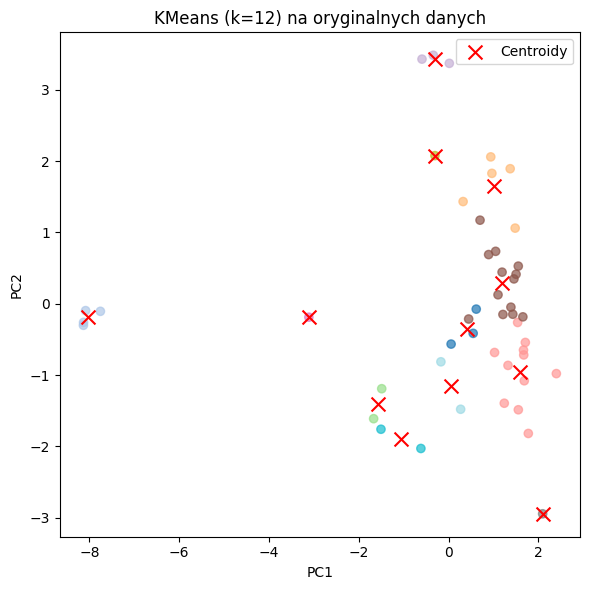

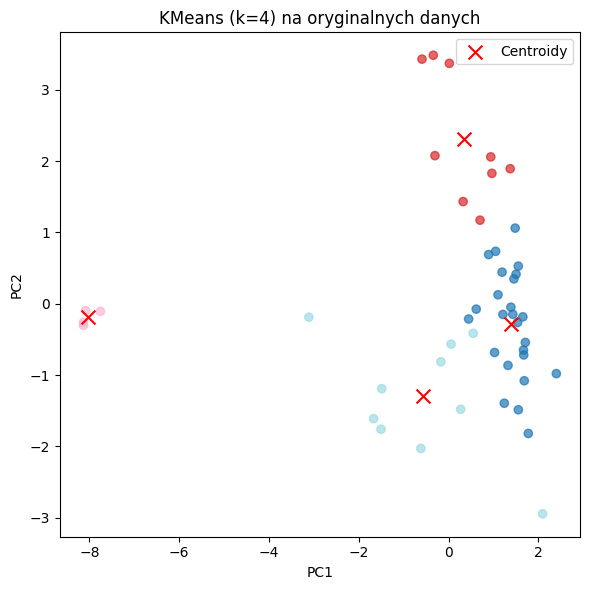

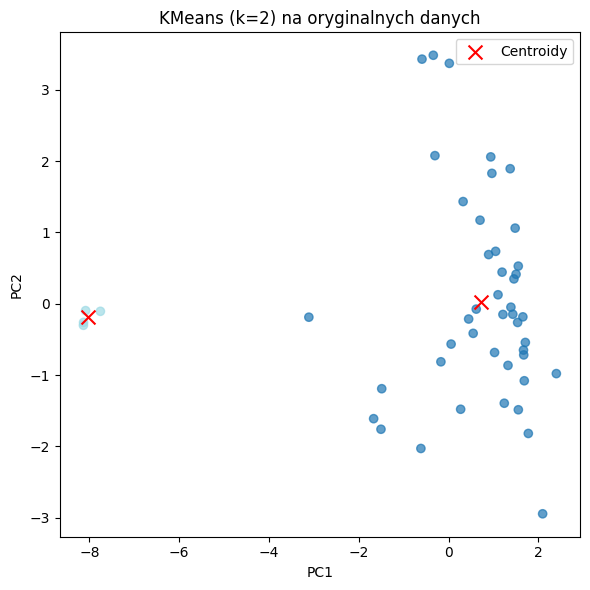

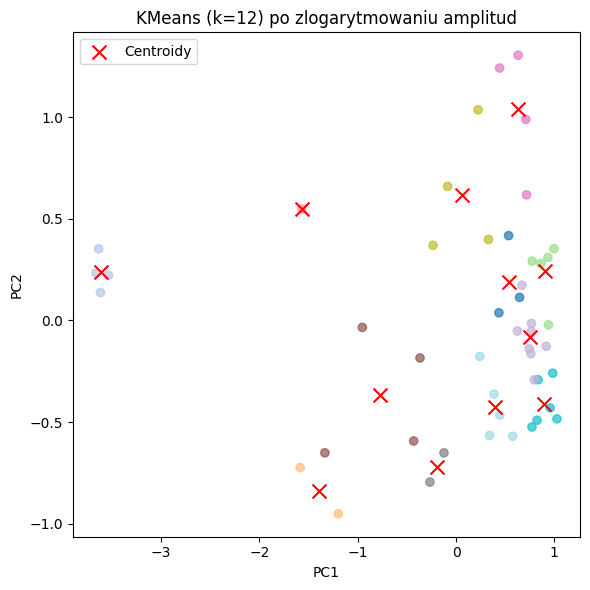

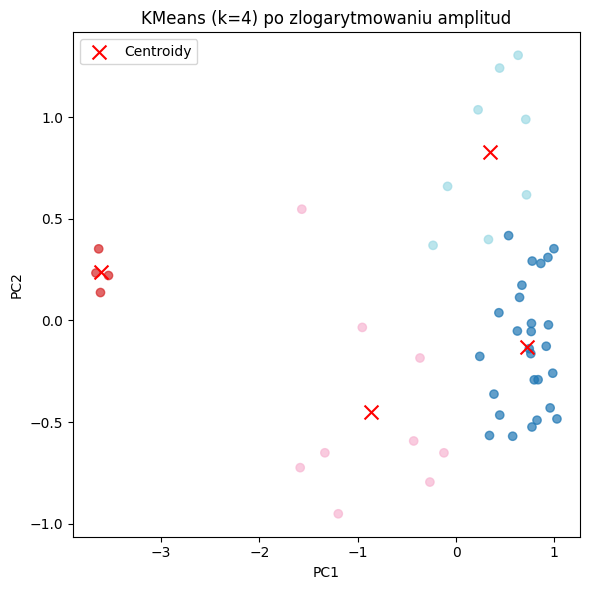

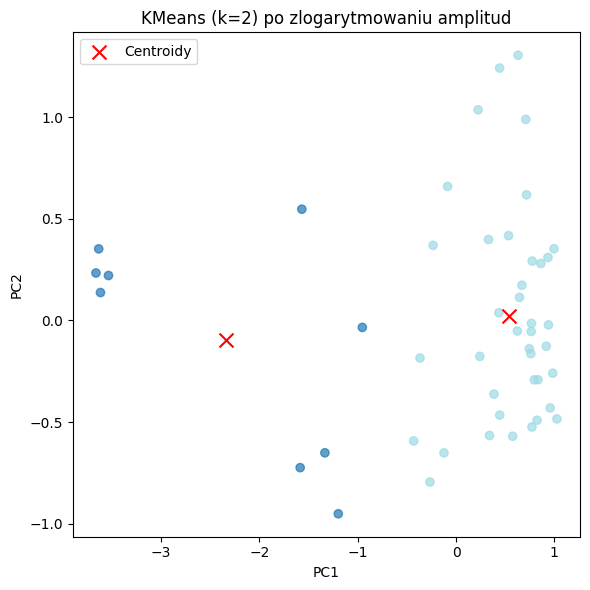

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Wczytanie danych
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
data = np.genfromtxt('162961-clustersel.txt', delimiter='\t')
X = data[:,:-1]
y = data[:,-1].astype(int)
etykiety = [GLOSKI[nr%100]+str(nr//100) for nr in y]

# PCA do 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Funkcja do wizualizacji
def plot_kmeans(X, X_reduced, pca, k, title):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    clusters = k_means.fit_predict(X)
    centers_trans = pca.transform(k_means.cluster_centers_)
    plt.figure(figsize=(6,6))
    scatter = plt.scatter(X_reduced[:,0], X_reduced[:,1], c=clusters, cmap='tab20', alpha=0.7)
    plt.scatter(centers_trans[:,0], centers_trans[:,1], marker='x', color='red', s=100, label='Centroidy')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.tight_layout()
    plt.show()

# KMeans dla k=12, 4, 2
for k in [12, 4, 2]:
    plot_kmeans(X, X_reduced, pca, k, f'KMeans (k={k}) na oryginalnych danych')

# KMeans po zlogarytmowaniu amplitud
X_log = np.log1p(X)
pca_log = PCA(n_components=2)
X_log_reduced = pca_log.fit_transform(X_log)
for k in [12, 4, 2]:
    plot_kmeans(X_log, X_log_reduced, pca_log, k, f'KMeans (k={k}) po zlogarytmowaniu amplitud')

Przy k=12 klastry nie odpowiadają dokładnie poszczególnym głoskom. Część z nich trafia do kilku grup, inne są łączone razem. Na wykresie widać, że niektóre centroidy znajdują się w miejscach pozbawionych danych, a niektóre klastry zachodzą na siebie lub stykają się bardzo blisko.

Gdy ograniczymy liczbę klastrów do czterech, nie uzyskujemy wyraźnego podziału według wysokości dźwięku. Centroidy nie rozdzielają przestrzeni cech w sposób intuicyjny, przez co próbki o różnej wysokości trafiają do tej samej grupy.

Jeszcze gorzej wygląda to przy k=2. Punkty dzielą się na dwie grupy, ale podział nie pokrywa się z rozróżnieniem na samogłoski i spółgłoski. Centroidy są przesunięte w stronę większych skupisk zamiast reprezentować realne środki mas.

Przyczyną takiego stanu rzeczy jest złożoność widm sygnału. Cechy różnych głosek nakładają się na siebie, wysokość ma zróżnicowany wpływ, a surowa amplituda nie oddaje wprost tego, jak człowiek postrzega głośność.

Jeżeli najpierw zlogarytmujemy amplitudy, klastry stają się znacznie bardziej zwarte, punkty są mniej rozproszone, a centroidy trafniej wyznaczają środek grup. Taki zabieg lepiej odpowiada percepcji dźwięku przez człowieka i ułatwia interpretację wyników.

W kolejnych analizach warto więc korzystać z cech logarytmicznych — dzięki temu grupy będą bardziej czytelne, a wyniki bliższe naszym oczekiwaniom.

#### 6.

Zbudujemy teraz metodą sklearn.cluster.AgglomerativeClustering inną reprezentację skupień – dendrogram. Tak tak, to taka sama reprezentacja, której używają biolodzy do popularnych wizualizacji zależności przodek-potomek lub podobieństwa fenetycznego albo genetycznego. Biolodzy nawet, przy pewnych założeniach, wnioskują na podstawie tej reprezentacji o czasie, który upłynął pomiędzy poszczególnymi zdarzeniami w ewolucji. Informatycy też czasem stosują tę reprezentację w podobnym celu – zobacz Rys. 5 i 6 w tym artykule.

Przykładowy kod znajdziesz tutaj. W naszym przypadku chcemy narysować całe drzewo, więc używamy

   plot_dendrogram(model, labels=etykiety)
Załącz uzyskany obrazek.
Jak oceniasz ten rodzaj reprezentacji w porównaniu do wcześniej stosowanych centroidów w przestrzeni atrybutów? Czy niesie więcej, czy mniej informacji?
Porównując uzyskany efekt z "ground truth" (idealnym podziałem zgodnym z atrybutem decyzyjnym, którego ta metoda przecież nie znała) – czy uważasz, że grupowanie jest sensowne i się powiodło, czy nie?
A może algorytm ma więcej racji od atrybutu decyzyjnego i ujawnia więcej, niż "ground truth"?